<a href="https://colab.research.google.com/github/hijunshi/deep-learning-engineer/blob/homeworks_submission/%EC%9D%B4%EC%A4%80%EC%84%B1_2_excercise_%EB%B3%80%EC%88%98%EC%99%80%EC%83%81%EC%88%98%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Section 2. 변수와 상수 다루기
### _Objective_
Tensorflow 는 무엇이고 어떻게 구성되어 있는지 배워봅니다.


In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

## 문제 1. Hello Tensorflow World! 

+ 'Hello Tensorflow World' 문자열을 tf.constant 을 이용해 텐서화 하고 
Session 을 이용해 출력해 보세요.

In [0]:
# 우선 실행해 주세요.
tf.reset_default_graph()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 정답 확인란과 동일한 문자가 출력되면 됩니다.


In [0]:
# 정답을 입력해 주세요.
tf.reset_default_graph()

hw = tf.constant('Hello Tensorflow World', dtype = 'string')

sess = tf.Session()
sess.run(hw)


b'Hello Tensorflow World'

#### 정답 확인
* 아래와 같이 출력되면 됩니다.
````
b'Hello Tensorflow World!'
````

## 문제 2. 영상에 Gaussian 노이즈를 주기
![image](https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png)

* 위 영상에 정규분포로 만든 노이즈($\mu=0,\sigma=0.1$)를 더해주세요

#### hint)
1. 이미지와 동일한 shape의 행렬에 정규분포를 만들어 주어야 합니다.
2. 이미지에 


--2019-07-06 01:06:01--  https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400023 (391K) [image/png]
Saving to: ‘440px-Lenna.png.1’

440px-Lenna.png.1   100%[===================>] 390.65K  --.-KB/s    in 0.06s   

2019-07-06 01:06:01 (6.65 MB/s) - ‘440px-Lenna.png.1’ saved [400023/400023]



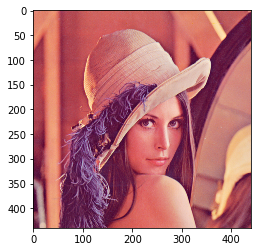

In [0]:
# 우선 실행해 주세요.
tf.reset_default_graph()
from PIL import Image
!wget https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png
    
image = np.array(Image.open("./440px-Lenna.png"))
image = image / 255. # 값의 범위를 0~1로 제한
image = image[:,:,:3] # alpha channel 없앰
plt.imshow(image)
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer2`에 담아주세요.

W0706 01:14:42.565439 139977958373248 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


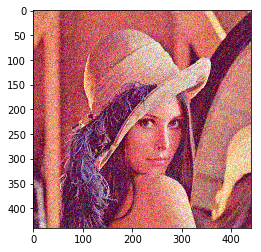

In [0]:
# 정답을 입력해 주세요.

rand_normal = tf.random_normal(shape=image.shape, mean=0.0, stddev=0.1, name = 'rand_normal')
sess = tf.Session()
rand_normal_ = sess.run(rand_normal)

answer2 = image + rand_normal_

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(answer2)

plt.show()

#### 정답 확인
* 아래의 이미지와 같이 노이즈가 있는 영상이 만들어지면 정답입니다.

![Imgur](https://i.imgur.com/aYJUvUO.png)

W0706 01:06:54.316554 139977958373248 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


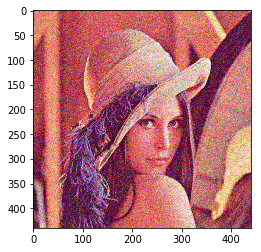

In [0]:
plt.imshow(answer2)
plt.show()

## 문제 3. 변수 카운터 만들기

+ 초기값은 0이고, `update_op`를 실행시킬 때마다 1씩 올라가는 변수를 만들어 주세요.

In [0]:
# 우선 실행해 주세요
tf.reset_default_graph()

In [0]:
#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 변수명은 `answer3`로, 값을 1씩 올려주는 Operation의 이름은 `update_op`로 해주세요

In [0]:
# 정답을 입력해 주세요


answer3 = tf.Variable(0,name = 'answer3')
update_op = tf.assign_add(ref=answer3, value=1)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(10):
    sess.run(update_op)
    print("{}번째 실행 : {}".format(i, sess.run(answer3)))

0번째 실행 : 1
1번째 실행 : 2
2번째 실행 : 3
3번째 실행 : 4
4번째 실행 : 5
5번째 실행 : 6
6번째 실행 : 7
7번째 실행 : 8
8번째 실행 : 9
9번째 실행 : 10


#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/1UBgG2w.png)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(10):
    sess.run(update_op)
    print("{}번째 실행 : {}".format(i,sess.run(answer3)))

0번째 실행 : 1
1번째 실행 : 2
2번째 실행 : 3
3번째 실행 : 4
4번째 실행 : 5
5번째 실행 : 6
6번째 실행 : 7
7번째 실행 : 8
8번째 실행 : 9
9번째 실행 : 10
